## Descriptive Statistics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load Data
# -------------------------------
df = pd.read_csv("../data/raw_analyst_ratings.csv")

# -------------------------------
# 2. Headline Length Statistics
# -------------------------------
df['headline_length'] = df['headline'].astype(str).str.len()
print("Headline Length Statistics:")
print(df['headline_length'].describe())
print("\n")

# -------------------------------
# 3. Articles Per Publisher
# -------------------------------
publisher_counts = df['publisher'].value_counts()
print("Top 10 Publishers:")
print(publisher_counts.head(10))
print("\n")

# -------------------------------
# 4. Convert Publication Dates
# -------------------------------
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_clean = df.dropna(subset=['date']).copy()

# Check if any failed to parse
num_invalid = df['date'].isna().sum()
print(f"Number of invalid/unparsed dates: {num_invalid}")
print("\n")

# -------------------------------
# 5. Daily Publication Counts
# -------------------------------
daily_counts = df.groupby(df['date'].dt.date).size()
print("Daily Publication Counts:")
print(daily_counts.head())


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


Number of invalid/unparsed dates: 1351341


Daily Publication Counts:
date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
dtype: int64


## Text Analysis

In [ ]:
#Tokenization and keyword extraction
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['headline'])

keywords = vectorizer.get_feature_names_out()
print("Top keywords:", keywords)


Top keywords: ['00' '10' '52' 'announces' 'bank' 'benzinga' 'buy' 'companies' 'company'
 'coverage' 'day' 'downgrades' 'earnings' 'energy' 'eps' 'est' 'estimate'
 'higher' 'initiates' 'lower' 'lowers' 'maintains' 'market' 'mid' 'moving'
 'neutral' 'new' 'price' 'pt' 'q1' 'q2' 'q3' 'q4' 'raises' 'reports'
 'sales' 'says' 'scheduled' 'sees' 'session' 'share' 'shares' 'stock'
 'stocks' 'target' 'trading' 'update' 'upgrades' 'vs' 'week']


## Time Series Analysis

<Axes: title={'center': 'Articles Published by Day of Week'}, xlabel='day_of_week'>

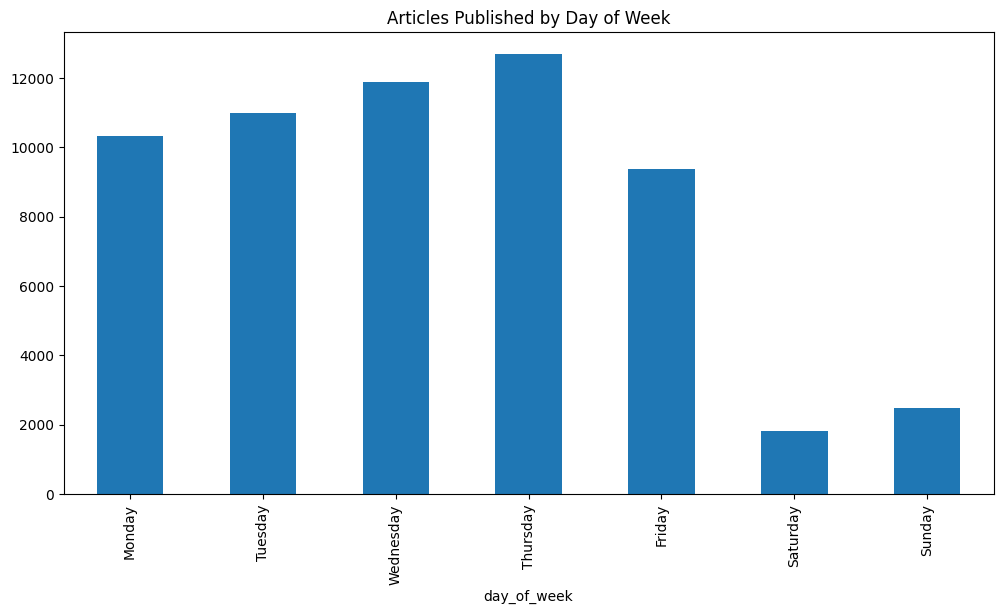

In [ ]:
# Publication frequency over time
daily_counts = df.groupby(df['date'].dt.date).size()
daily_counts.plot(figsize=(12,6), title='Daily Article Frequency')

# Hourly publishing analysis
df['hour'] = df['date'].dt.hour
hourly_counts = df.groupby('hour').size()
hourly_counts.plot(kind='bar', title='Articles Published by Hour')

#Day-of-week analysis
df['day_of_week'] = df['date'].dt.day_name()
day_counts = df.groupby('day_of_week').size().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
day_counts.plot(kind='bar', title='Articles Published by Day of Week')


## Publisher Analysis

In [ ]:
# Most active publishers
top_publishers = df['publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', title='Top 10 Publishers')

# Publisher types / domains (if emails)
df['domain'] = df['publisher'].str.extract(r'@([A-Za-z0-9.-]+)')
domain_counts = df['domain'].value_counts()
domain_counts.head(10).plot(kind='bar', title='Top Publisher Domains')
